<a href="https://colab.research.google.com/github/maverick19-hub/Work/blob/main/NLP_text_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from textblob import TextBlob

# Download NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# New Section

In [30]:
# 2. Load and Parse the Dataset
hts = pd.read_csv('/content/HateSpeechRaw (1).csv', header=None, names=['raw'])
hts['raw'] = hts['raw'].str.lstrip(';')
data_split = hts['raw'].str.split(';', expand=True)

# Select only the first 50 rows
data = data_split.iloc[:50, :]
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,tweet,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2017-10-18 11:04,0,0,"""That #ShangweVedio should be replaced. Where ...",,,#ShangweVedio #AkombeMustGo,"""920561132846374912""",https://twitter.com/GordonOka/status/920561132...,None,...,None,None,None,None,None,None,None,None,None,None
2,2017-10-18 09:15,0,1,"""they wrote letters to iebc their bloggers tre...",,,#akombemustgo,"""920533868758872064""",https://twitter.com/Kianangih/status/920533868...,None,...,None,None,None,None,None,None,None,None,None,None
3,2017-10-18 09:06,0,2,"""Akombe was a nasa mole Jubilee never wanted...",,,#AkombeMustGo,"""920531601775316992""",https://twitter.com/Kianangih/status/920531601...,None,...,None,None,None,None,None,None,None,None,None,None
4,2017-10-04 12:24,0,0,"""@paulinenjoroge @OleItumbi @JubileePartyK @Te...",,@paulinenjoroge @OleItumbi @JubileePartyK @Tea...,#AkombeMustGo,"""915507834841976832""",https://twitter.com/PapaJesse4/status/91550783...,None,...,None,None,None,None,None,None,None,None,None,None
5,2017-09-25 20:20,0,0,"""#akombemustgo""",,,#akombemustgo,"""912366240160677889""",https://twitter.com/dennisomanga/status/912366...,None,...,None,None,None,None,None,None,None,None,None,None
6,2017-09-25 16:36,3,0,"""if what am seeing doing rounds on social medi...",,,#AkombemustGo,"""912309936381710337""",https://twitter.com/iancollinsbett/status/9123...,None,...,None,None,None,None,None,None,None,None,None,None
7,2017-09-23 16:27,0,1,"""All the chaps saying #AkombeMustGo . Be speci...",,,#AkombeMustGo,"""911582898029043712""",https://twitter.com/MwangiJmacs/status/9115828...,None,...,None,None,None,None,None,None,None,None,None,None
8,2017-09-23 16:23,0,0,"""This is amazing. #AkombeMustGo . Guys are tru...",,,#AkombeMustGo,"""911581831652368384""",https://twitter.com/MwangiJmacs/status/9115818...,None,...,None,None,None,None,None,None,None,None,None,None
9,2017-09-23 16:13,11,3,"""#AkombeMustGo This she devil sold this nation...",,,#AkombeMustGo,"""911579382480850944""",https://twitter.com/MarionWanjiru20/status/911...,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
# Check number of columns and assign appropriate column names
data_split = data.rename(columns={0: 'datetime', 3: 'text'})
df = data_split[['datetime', 'text']].copy()
df['text'] = df['text'].str.strip('"')
df

,datetime,text
0,tweet,None
1,2017-10-18 11:04,That #ShangweVedio should be replaced. Where d...
2,2017-10-18 09:15,they wrote letters to iebc their bloggers tren...
3,2017-10-18 09:06,Akombe was a nasa mole Jubilee never wanted ...
4,2017-10-04 12:24,@paulinenjoroge @OleItumbi @JubileePartyK @Tea...
5,2017-09-25 20:20,#akombemustgo
6,2017-09-25 16:36,if what am seeing doing rounds on social media...
7,2017-09-23 16:27,All the chaps saying #AkombeMustGo . Be specif...
8,2017-09-23 16:23,This is amazing. #AkombeMustGo . Guys are true...
9,2017-09-23 16:13,#AkombeMustGo This she devil sold this nation ...


In [32]:
# 3. Drop Missing Values
df.dropna(subset=['text'], inplace=True)

# Remove HTML tags and special characters
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # mentions and hashtags
    text = re.sub(r'\d+', '', text)  # numbers
    text = re.sub(rf"[{string.punctuation}]", '', text)  # punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # extra whitespace
    return text

df['cleaned text'] = df['text'].apply(clean_text)
df['cleaned text']

,cleaned text
1,That should be replaced Where did disappeared
2,they wrote letters to iebc their bloggers tren...
3,Akombe was a nasa mole Jubilee never wanted hi...
4,Akuna kulala pictwittercomwFYuRYwX
5,
6,if what am seeing doing rounds on social media...
7,All the chaps saying Be specific coz even the ...
8,This is amazing Guys are true wikileaks twitte...
9,This she devil sold this nation to the dogs pi...
10,Suddenly the dogs have backed away from


In [33]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Tokenization
df['tokens'] = df['cleaned text'].apply(word_tokenize)
df['tokens']

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,tokens
1,"[That, should, be, replaced, Where, did, disap..."
2,"[they, wrote, letters, to, iebc, their, blogge..."
3,"[Akombe, was, a, nasa, mole, Jubilee, never, w..."
4,"[Akuna, kulala, pictwittercomwFYuRYwX]"
5,[]
6,"[if, what, am, seeing, doing, rounds, on, soci..."
7,"[All, the, chaps, saying, Be, specific, coz, e..."
8,"[This, is, amazing, Guys, are, true, wikileaks..."
9,"[This, she, devil, sold, this, nation, to, the..."
10,"[Suddenly, the, dogs, have, backed, away, from]"


In [34]:
# Normalization: Lowercasing
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])
df['tokens']

,tokens
1,"[that, should, be, replaced, where, did, disap..."
2,"[they, wrote, letters, to, iebc, their, blogge..."
3,"[akombe, was, a, nasa, mole, jubilee, never, w..."
4,"[akuna, kulala, pictwittercomwfyurywx]"
5,[]
6,"[if, what, am, seeing, doing, rounds, on, soci..."
7,"[all, the, chaps, saying, be, specific, coz, e..."
8,"[this, is, amazing, guys, are, true, wikileaks..."
9,"[this, she, devil, sold, this, nation, to, the..."
10,"[suddenly, the, dogs, have, backed, away, from]"


In [35]:
# Spelling Correction
df['tokens'] = df['tokens'].apply(lambda x: [str(TextBlob(word).correct()) for word in x])
df['tokens']

,tokens
1,"[that, should, be, replaced, where, did, disap..."
2,"[they, wrote, letters, to, debt, their, bagger..."
3,"[akimbo, was, a, nasal, mole, jubilee, never, ..."
4,"[anna, kulala, pictwittercomwfyurywx]"
5,[]
6,"[if, what, am, seeing, doing, rounds, on, soci..."
7,"[all, the, chaps, saying, be, specific, co, ev..."
8,"[this, is, amazing, guns, are, true, wikileaks..."
9,"[this, she, devil, sold, this, nation, to, the..."
10,"[suddenly, the, dogs, have, backed, away, from]"


In [36]:
# Stopword Removal
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokens']

,tokens
1,"[replaced, disappeared]"
2,"[wrote, letters, debt, baggers, tended, wanted..."
3,"[akimbo, nasal, mole, jubilee, never, wanted, ..."
4,"[anna, kulala, pictwittercomwfyurywx]"
5,[]
6,"[seeing, rounds, social, media, true, definite..."
7,"[chaps, saying, specific, co, even, jails, are..."
8,"[amazing, guns, true, wikileaks, twittercommar..."
9,"[devil, sold, nation, dogs, pictwittercomakltd..."
10,"[suddenly, dogs, backed, away]"


In [37]:
# Stemming and Lemmatization
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(stemmer.stem(word)) for word in x])
df['tokens']

,tokens
1,"[replac, disappear]"
2,"[wrote, letter, debt, bagger, tend, want, call..."
3,"[akimbo, nasal, mole, jubile, never, want, sep..."
4,"[anna, kulala, pictwittercomwfyurywx]"
5,[]
6,"[see, round, social, medium, true, definit, he..."
7,"[chap, say, specif, co, even, jail, arentvsuff..."
8,"[amaz, gun, true, wikileak, twittercommarionwa..."
9,"[devil, sold, nation, dog, pictwittercomakltddbn]"
10,"[sudden, dog, back, away]"


In [38]:
# Convert back to string
df['final_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df['final_text']

,final_text
1,replac disappear
2,wrote letter debt bagger tend want call riot
3,akimbo nasal mole jubile never want septemb ba...
4,anna kulala pictwittercomwfyurywx
5,
6,see round social medium true definit head wron...
7,chap say specif co even jail arentvsuffici goo...
8,amaz gun true wikileak twittercommarionwanjiru...
9,devil sold nation dog pictwittercomakltddbn
10,sudden dog back away


In [40]:
# Remove duplicate tweets
df.drop_duplicates(subset='final_text', inplace=True)


In [41]:
# Word Frequency
from collections import Counter
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

In [42]:
word_freq

Counter({'replac': 1,
         'disappear': 1,
         'wrote': 1,
         'letter': 1,
         'debt': 6,
         'bagger': 2,
         'tend': 2,
         'want': 3,
         'call': 1,
         'riot': 1,
         'akimbo': 12,
         'nasal': 11,
         'mole': 4,
         'jubile': 4,
         'never': 2,
         'septemb': 1,
         'leak': 2,
         'chat': 1,
         'oregon': 3,
         'anna': 1,
         'kulala': 1,
         'pictwittercomwfyurywx': 1,
         'see': 1,
         'round': 1,
         'social': 1,
         'medium': 1,
         'true': 2,
         'definit': 1,
         'head': 1,
         'wrong': 1,
         'way': 2,
         'countri': 2,
         'chap': 1,
         'say': 5,
         'specif': 1,
         'co': 1,
         'even': 3,
         'jail': 1,
         'arentvsuffici': 1,
         'good': 1,
         'still': 1,
         'guillotin': 1,
         'amaz': 1,
         'gun': 2,
         'wikileak': 1,
         'twittercommarionwan

In [43]:
common_words

[('akimbo', 12),
 ('nasal', 11),
 ('debt', 6),
 ('say', 5),
 ('back', 5),
 ('mole', 4),
 ('jubile', 4),
 ('status', 4),
 ('…', 4),
 ('ask', 4),
 ('want', 3),
 ('oregon', 3),
 ('even', 3),
 ('wont', 3),
 ('peopl', 3),
 ('support', 3),
 ('rail', 3),
 ('pay', 3),
 ('elect', 3),
 ('face', 3)]

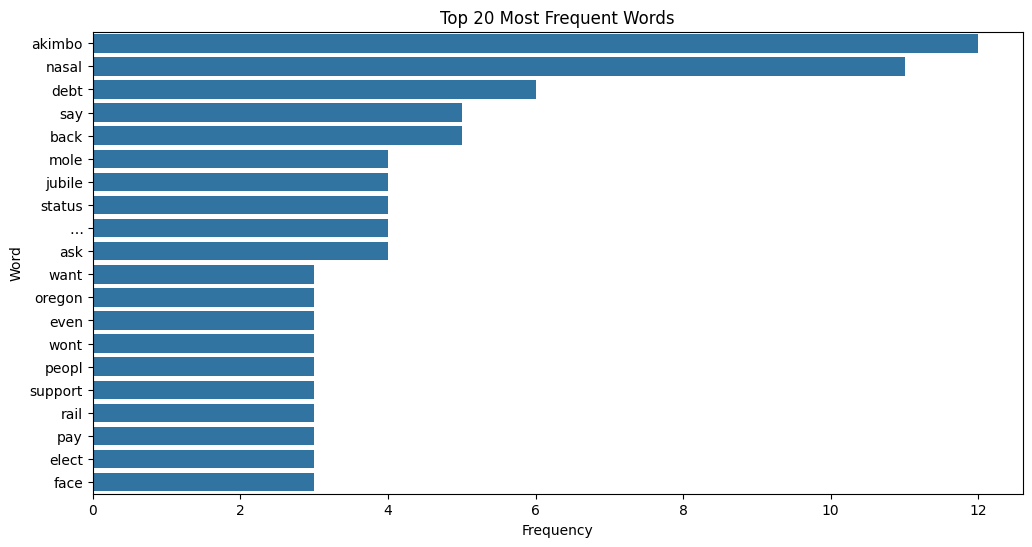

In [44]:
# Plot Top Words
words, freqs = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(freqs), y=list(words))
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

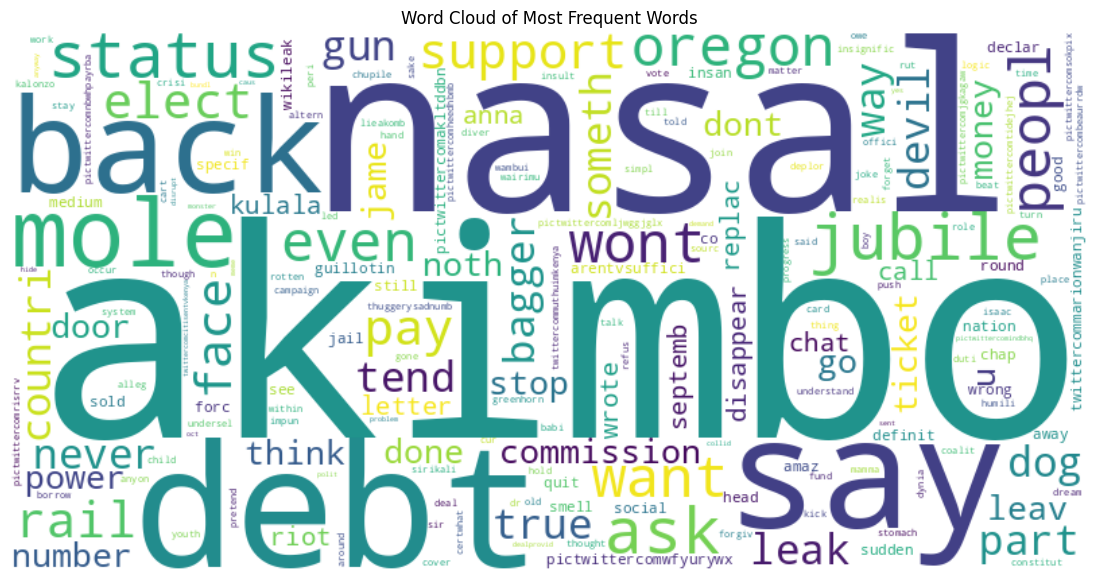

In [45]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()

In [46]:
# 6. Summary
print("Total tweets after cleaning and deduplication:", len(df))
print("Total unique words:", len(word_freq))
print("Most frequent word:", word_freq.most_common(1)[0])

Total tweets after cleaning and deduplication: 48
Total unique words: 257
Most frequent word: ('akimbo', 12)
